In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pprint
from pandas import DataFrame
from datetime import date, time, timedelta, datetime

from sklearn import datasets, linear_model
from sklearn.cross_validation import cross_val_score

from sklearn.cross_validation import train_test_split
from altair import *


plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display
from unidecode import unidecode

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('../data/interim/entries_per_day_2017_01_30_3(dummy_coded).csv')

In [4]:
predictors = [x for x in df.columns if x not in 'entries']

In [5]:
X = df[predictors].values
y = df['entries'].values

In [6]:
# initialising the Standardscaler object:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# using the fit_transform function to normalise the X matrix:
Xn = ss.fit_transform(X)

In [7]:
# fitting a linear regression:

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

<H3> Fitting using Lasso <H3>

In [21]:
# there might be high correlation between variables of our predictor matrix X.
# let's see if lasso or ridge can overcome that.

In [80]:
from sklearn.linear_model import LassoCV, Lasso, RidgeCV
from sklearn.preprocessing import StandardScaler

In [81]:
# Finding an optimal value for Lasso regression alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=3, verbose=1)
optimal_lasso.fit(Xn, y)

print optimal_lasso.alpha_

2363.06216749


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [82]:
# Cross-validating the Lasso  R2  with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xn, y, cv=3)

print lasso_scores
print np.mean(lasso_scores)

[ 0.53322364  0.40651866  0.39750849]
0.445750261236


In [83]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(Xn,y,test_size = 0.33)
lasso.fit(X_train, y_train)

Lasso(alpha=2363.0621674861222, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
lasso.score(X_test,y_test)

0.48931765929148985

In [85]:
predictions = lasso.predict(X_test)

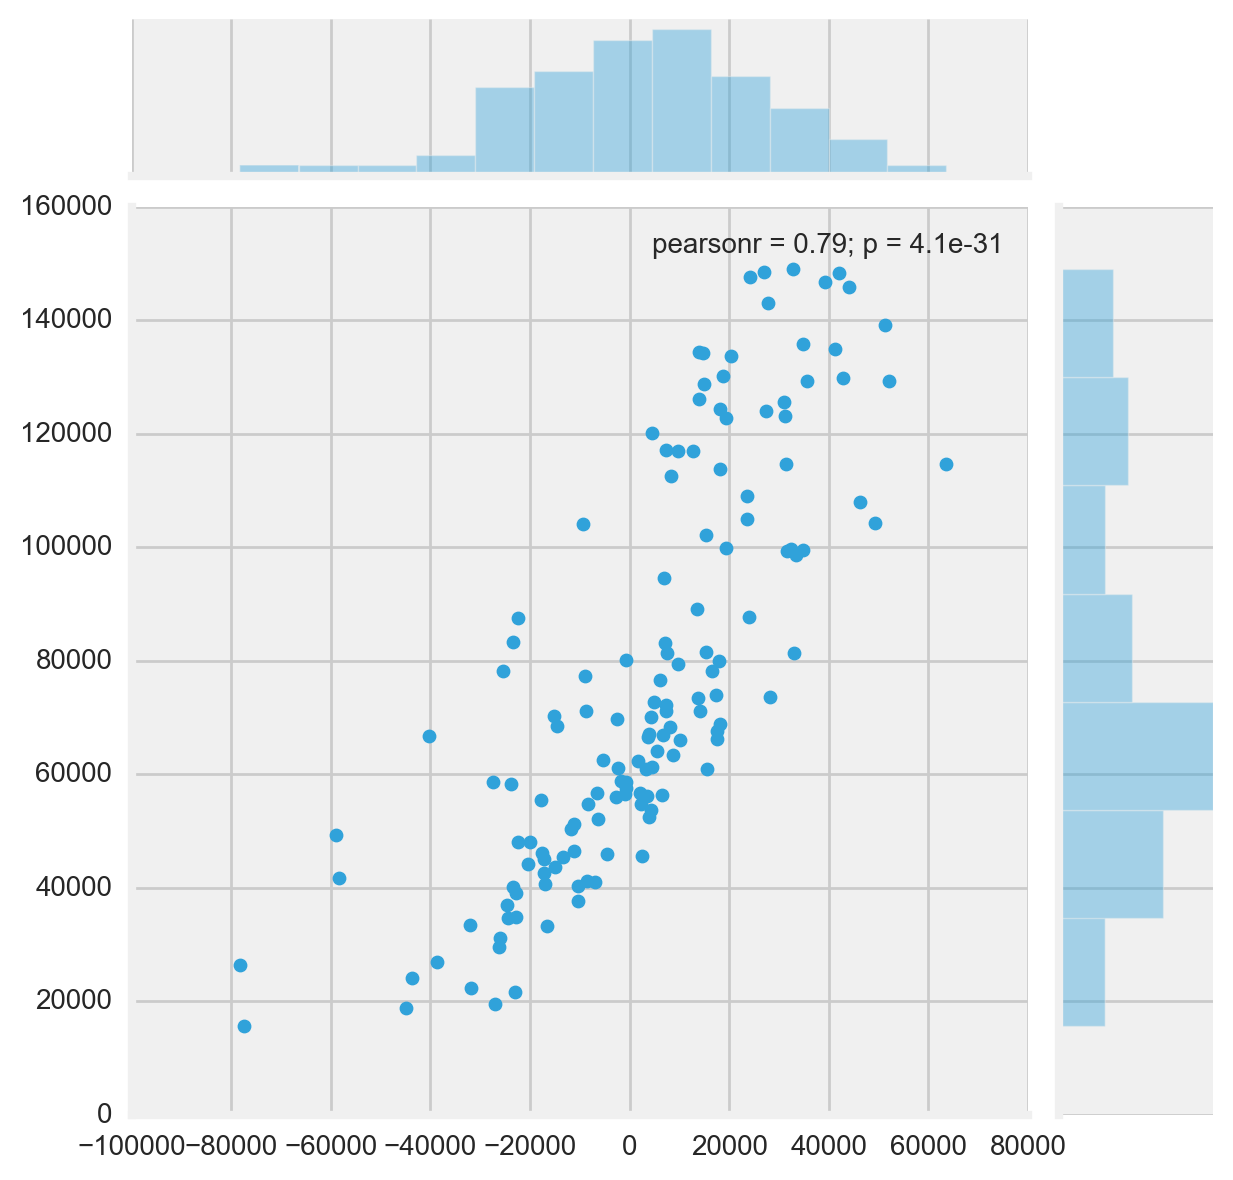

In [86]:
# residuals against the true values
sns.jointplot(y_test - predictions, y_test)

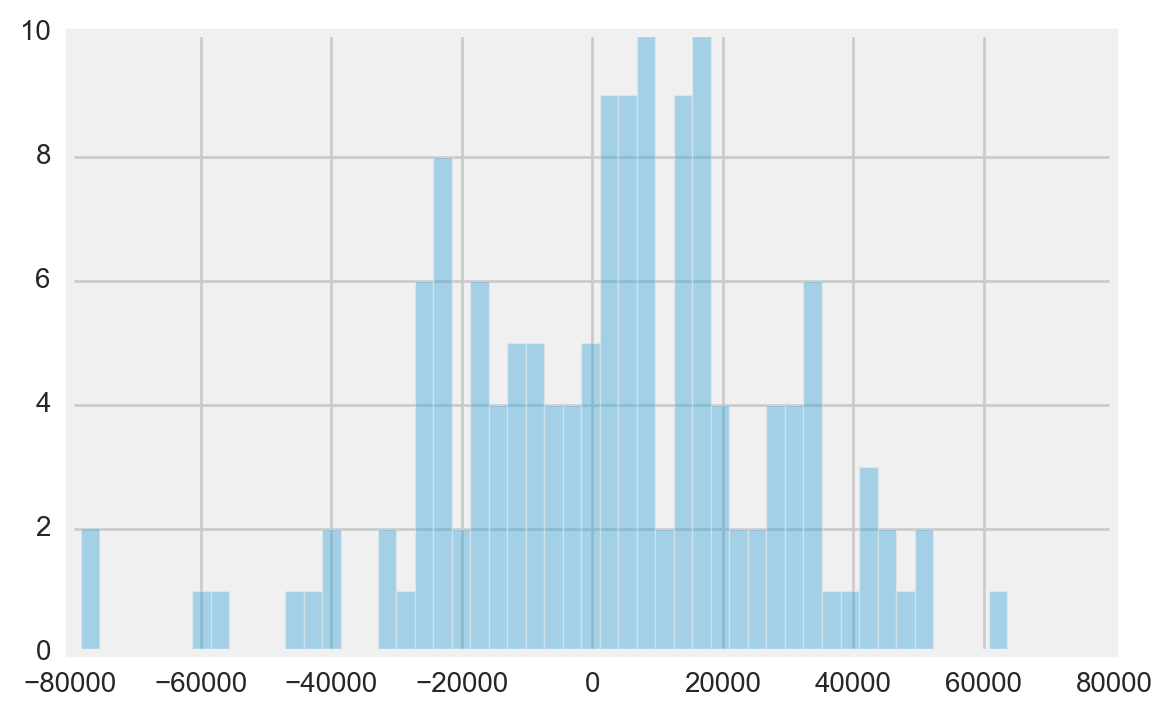

In [87]:
# histogram of the residuals
sns.distplot(y_test-predictions, bins = 50, kde = False)

In [88]:
print 'mean absolute error = ',np.mean(abs(predictions - y_test))

mean absolute error =  19731.8044751


In [89]:
# plot to show the strength of the different coefficients
coef_df = pd.DataFrame({
        'predictor': predictors,
        'coef': lasso.coef_
         })

coef_df.sort_values('coef', inplace = True)

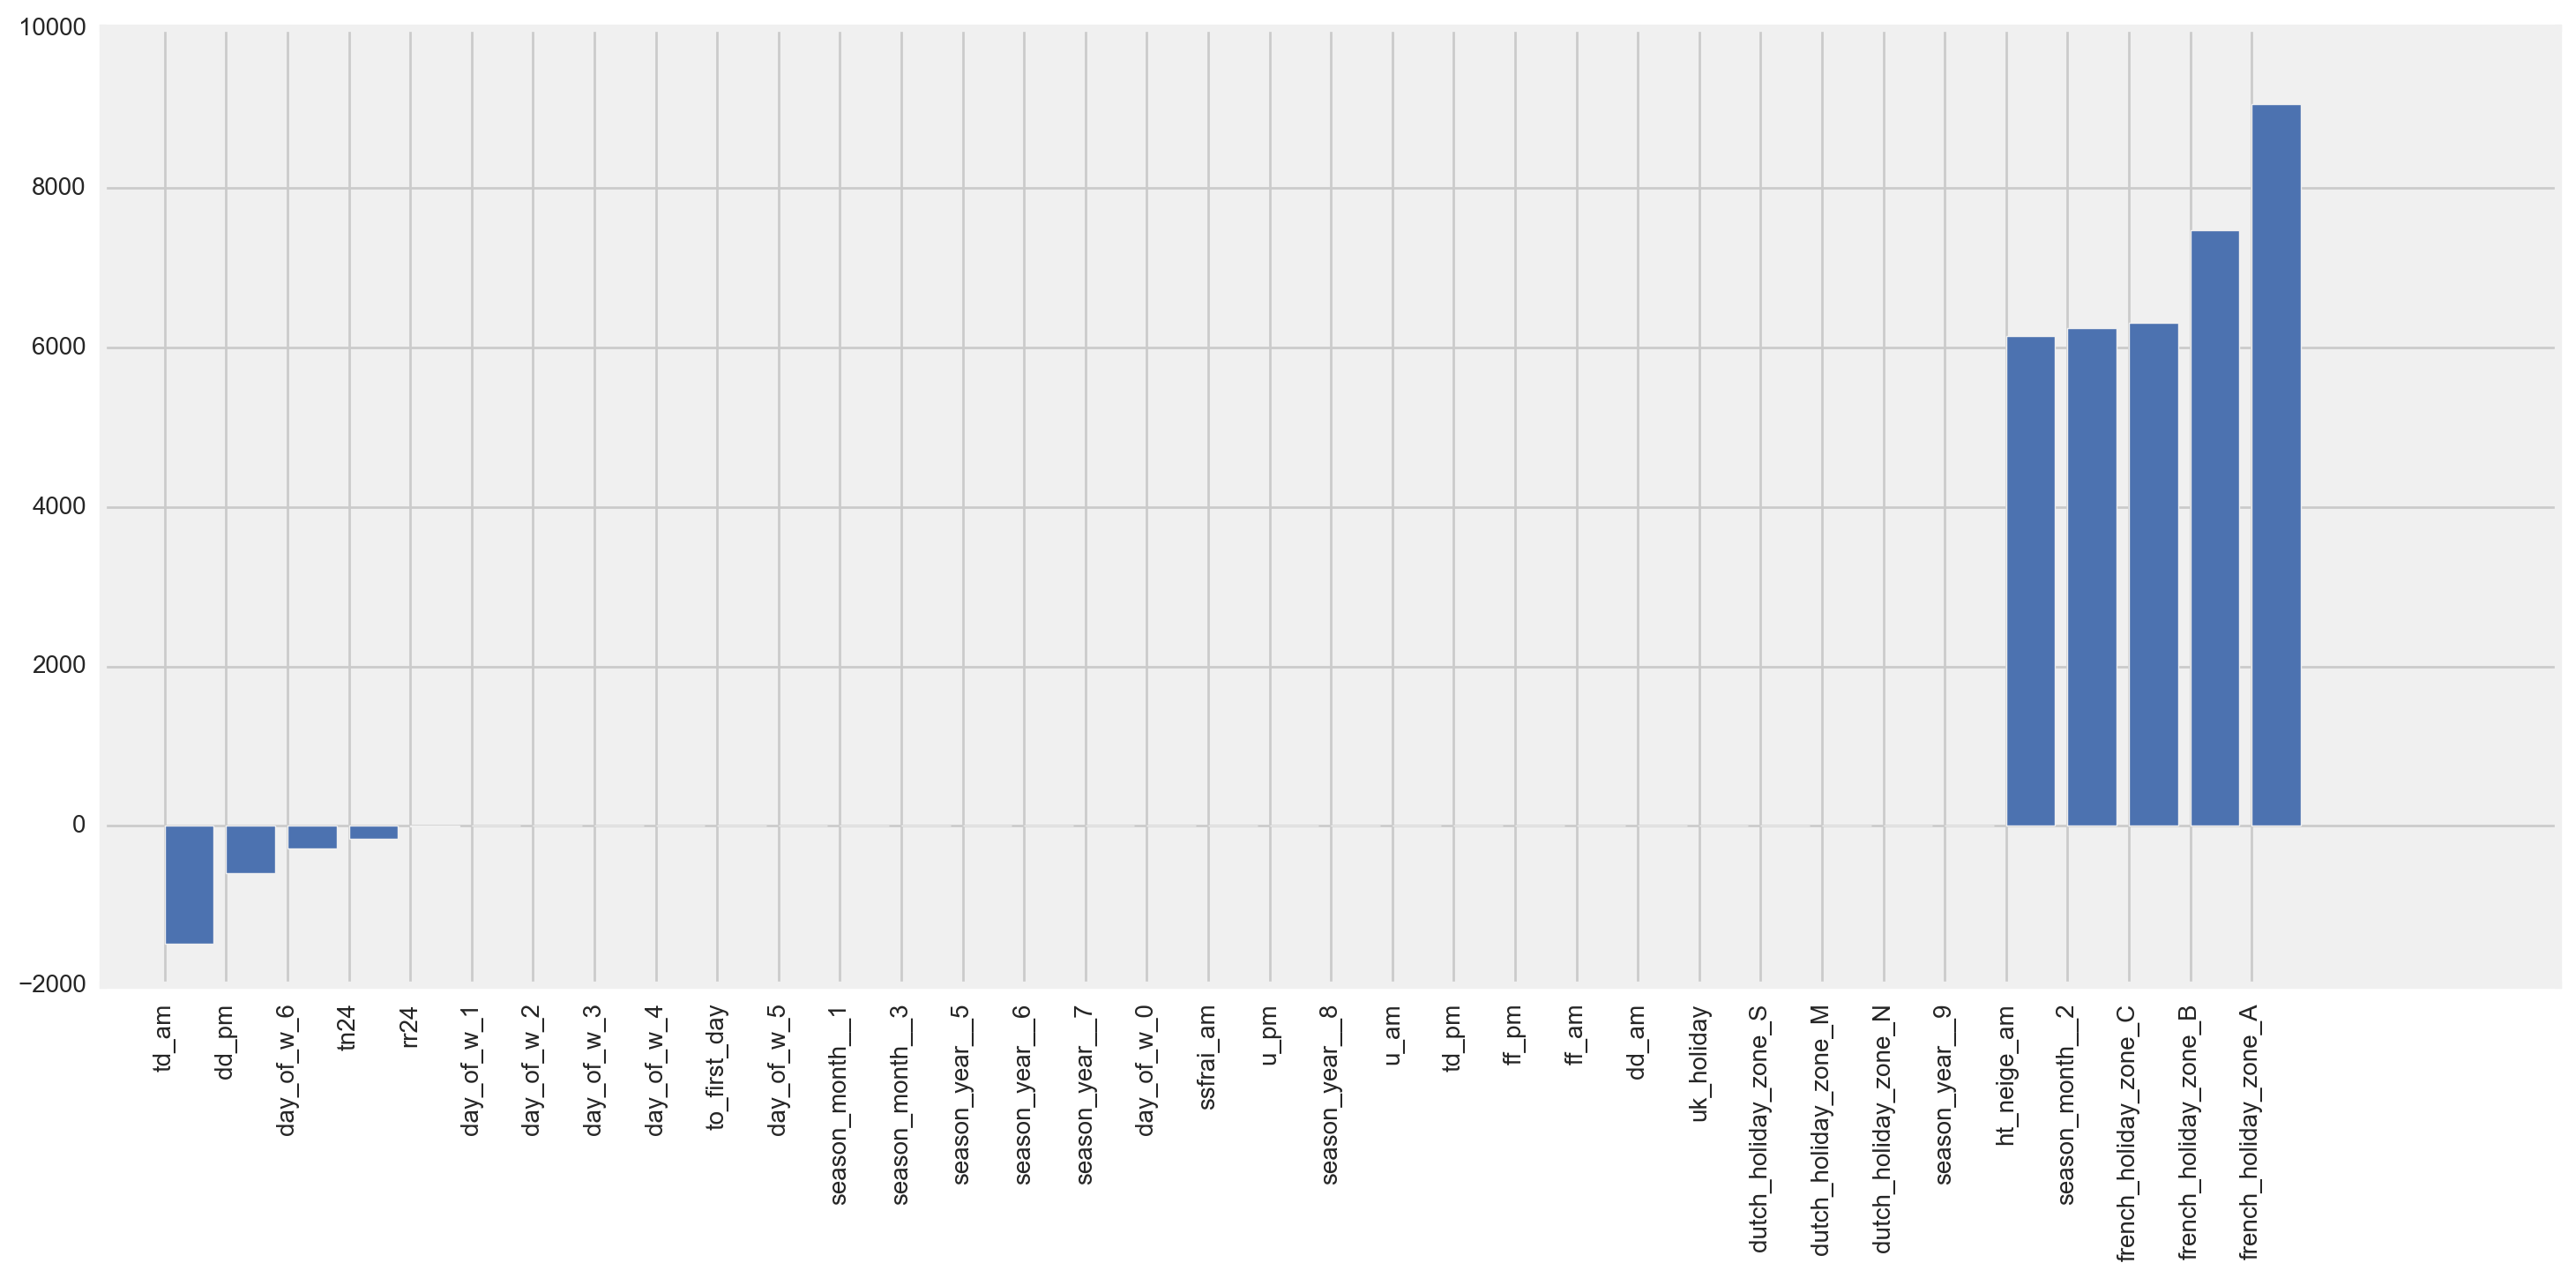

In [90]:
fig, ax = plt.subplots(figsize = (16,7))
ax.bar(range(1,coef_df.shape[0]+1), coef_df.coef, tick_label = coef_df.predictor.values)
ax.set_xticklabels(coef_df.predictor.values, rotation=90)
plt.show()

In [91]:
lasso_coefs = pd.DataFrame({'variable':df[predictors].columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
3,9051.417797,9051.417797,french_holiday_zone_A
1,7469.646382,7469.646382,french_holiday_zone_B
2,6304.651850,6304.651850,french_holiday_zone_C
28,6237.507755,6237.507755,season_month__2
18,6141.413719,6141.413719,ht_neige_am
14,1479.882279,-1479.882279,td_am
11,594.293645,-594.293645,dd_pm
26,287.436935,-287.436935,day_of_w_6
9,164.111241,-164.111241,tn24
8,1.955139,-1.955139,rr24
